# Лабораторная работа 2.
## Построение интерполяционного полинома Лагранжа 3-й степени
### Задание 2.1
Приближение функции, заданной таблицей значений

In [3]:
using LinearAlgebra
using Polynomials
using Plots

┌ Info: Precompiling Polynomials [f27b6e38-b328-58d1-80ce-0feddd5e7a45]
└ @ Base loading.jl:1342
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342
┌ Warning: Module JSON with build ID 27402172609176 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Info: Skipping precompilation since __precompile__(false). Importing Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80].
└ @ Base loading.jl:1047


In [4]:
x=[1; 2; 3; 4]
y=[3; 5; 20; 47]

4-element Vector{Int64}:
  3
  5
 20
 47

In [5]:
n=3
v_m_3=[ones(n+1) x x.^2 x.^3]

4×4 Matrix{Float64}:
 1.0  1.0   1.0   1.0
 1.0  2.0   4.0   8.0
 1.0  3.0   9.0  27.0
 1.0  4.0  16.0  64.0

In [6]:
a=[v_m_3 y]

4×5 Matrix{Float64}:
 1.0  1.0   1.0   1.0   3.0
 1.0  2.0   4.0   8.0   5.0
 1.0  3.0   9.0  27.0  20.0
 1.0  4.0  16.0  64.0  47.0

In [7]:
coefs=[]
for i in 1:4
    push!(coefs,(-1)^(i+1)*det(a[:,1:size(a,2) .!= i ]))
end

coefs=-coefs./det(v_m_3)

4-element Vector{Float64}:
  15.0
 -19.333333333333357
   7.500000000000007
  -0.16666666666666785

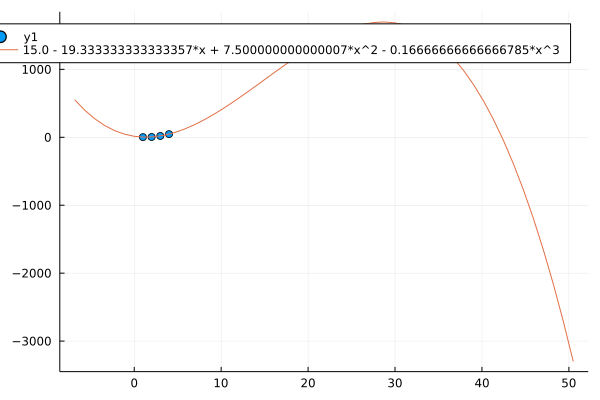

In [8]:
plot!(scatter(x,y))
plot!(Polynomial(coefs))

# Задание 2.2
Проверка значений функции в узлах интерполирования на соответсвие значениям интерполяционного полинома

In [9]:
for i in 1:size(x)[1]
    println(Polynomial(coefs)(x[i]))
end

2.9999999999999822
4.999999999999972
19.99999999999996
46.99999999999994


# Задание 2.3
Проверка суммы коэффициентов Лагранжа

In [10]:
l=[
    fromroots(x[[1:k-1;k+1:end]])/fromroots(x[[1:k-1;k+1:end]])(x[k])
    for k ∈ 1:size(x)[1]
    ]



print("l1: ")
println(l[1])
print("l2: ")|
println(l[2])
print("l3: ")
println(l[3])
print("l4: ")
println(l[4])

l1: 4.0 - 4.33333*x + 1.5*x^2 - 0.166667*x^3
l2: -6.0 + 9.5*x - 4.0*x^2 + 0.5*x^3


LoadError: MethodError: no method matching |(::Nothing, ::Nothing)
[0mClosest candidates are:
[0m  |(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560

In [11]:
l |> sum 
sum(l)(x[1])

1.0000000000000002

# Способ 2 (встроенная функция)

In [12]:
interpol=fit(x,y) 

Polynomial(15.0 - 19.333333333333332*x + 7.5*x^2 - 0.16666666666666666*x^3)

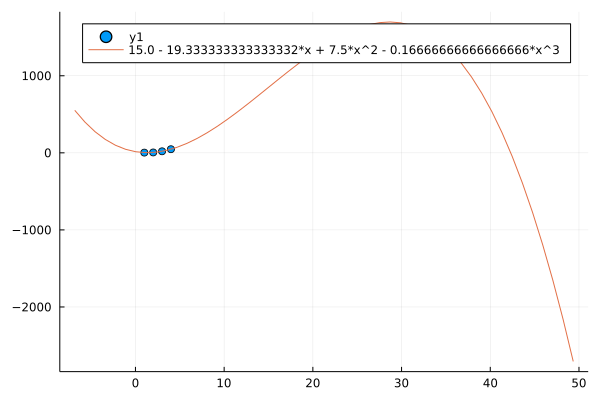

In [13]:
plot!(scatter(x,y))
plot!(interpol)

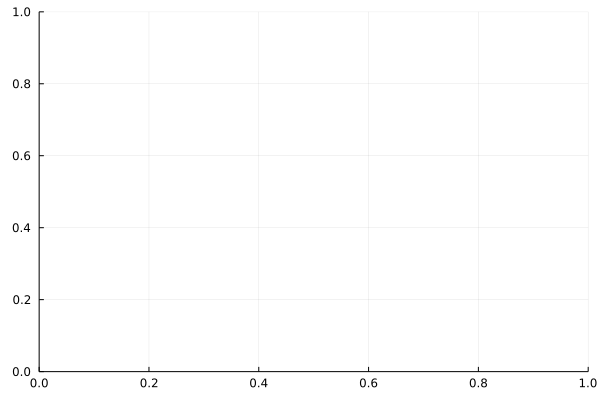

In [14]:
plot()
